# New Section

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/sample_data/movies.csv')

# Display first few rows of the data
print(data.head())

  index       Budget                                     genre  \
0   0.0  237000000.0  Action Adventure Fantasy Science Fiction   
1   1.0  300000000.0                  Adventure Fantasy Action   
2   2.0  245000000.0                    Action Adventure Crime   
3   3.0  250000000.0               Action Crime Drama Thriller   
4   4.0  260000000.0          Action Adventure Science Fiction   

            Director                                              Actor  \
0      James Cameron  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1     Gore Verbinski  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2         Sam Mendes  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christopher Nolan  Christian Bale Michael Caine Gary Oldman Anne ...   
4     Andrew Stanton  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                Movie Title Release Year Duration Rating  \
0                                    Avatar   10-12-2009    162.0    7.2   


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop or fill missing values
data = data.dropna()  # Or use data.fillna(...)

# Check data types
print(data.dtypes)


index              18
Budget             18
genre              46
Director           55
Actor              62
                 ... 
Unnamed: 1244    4826
Unnamed: 1245    4826
Unnamed: 1246    4826
Unnamed: 1247    4826
Unnamed: 1248    4826
Length: 1249, dtype: int64
index            object
Budget           object
genre            object
Director         object
Actor            object
                  ...  
Unnamed: 1244    object
Unnamed: 1245    object
Unnamed: 1246    object
Unnamed: 1247    object
Unnamed: 1248    object
Length: 1249, dtype: object


In [ ]:
# One-hot encode the genre column
data_genres = data['genre'].str.get_dummies(sep=',')
data = pd.concat([data, data_genres], axis=1)

# One-hot encode the director and actors if necessary
data = pd.get_dummies(data, columns=['Director', 'Actor'])

# Normalize numerical features (like budget, duration, etc.)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Budget', 'Duration']] = scaler.fit_transform(data[['Budget', 'Duration']])


In [ ]:
# Before splitting, check the shape of your data to see how many samples you have
print("Shape of data:", data.shape)

X = data.drop(columns=['Rating'])  # Features
y = data['Rating']  # Target variable

# If you still have very few samples, consider adjusting the test_size or using cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of data: (4827, 9520)


In [ ]:
# Add this before creating your features (X) and target (y)
for col in X.columns:
  if X[col].dtype == 'object':  # Check if the column has object (string) dtype
    try:
      X[col] = pd.to_numeric(X[col]) # Try converting to numeric, errors='coerce' to handle errors
    except ValueError:
      print(f"Column '{col}' contains non-numeric values and cannot be converted.")

# Now you can create features (X) and target (y)
X = data.drop(columns=['Rating'])  # Features
y = data['Rating']  # Target variable

Column 'index' contains non-numeric values and cannot be converted.
Column 'Budget' contains non-numeric values and cannot be converted.
Column 'genre' contains non-numeric values and cannot be converted.
Column 'Movie Title' contains non-numeric values and cannot be converted.
Column 'Release Year' contains non-numeric values and cannot be converted.
Column 'Duration' contains non-numeric values and cannot be converted.
Column 'Unnamed: 9' contains non-numeric values and cannot be converted.
Column 'Unnamed: 10' contains non-numeric values and cannot be converted.
Column 'Unnamed: 11' contains non-numeric values and cannot be converted.
Column 'Unnamed: 12' contains non-numeric values and cannot be converted.
Column 'Unnamed: 13' contains non-numeric values and cannot be converted.
Column 'Unnamed: 14' contains non-numeric values and cannot be converted.
Column 'Unnamed: 15' contains non-numeric values and cannot be converted.
Column 'Unnamed: 16' contains non-numeric values and canno

In [ ]:
# Load dataset
data = pd.read_csv('/content/sample_data/movies.csv')

# 1. Convert 'Budget' and 'Duration' to numeric before imputation:
data['Budget'] = pd.to_numeric(data['Budget'], errors='coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# 2. Split data into training and testing sets BEFORE imputation:
X = data.drop(columns=['Rating'])
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Impute missing values separately for training and testing sets:
# For numerical features:
for df in [X_train, X_test]:
    df['Budget'].fillna(X_train['Budget'].mean(), inplace=True)  # Use training set mean for imputation
    df['Duration'].fillna(X_train['Duration'].mean(), inplace=True) # Use training set mean for imputation

# For categorical features:
for df in [X_train, X_test]:
    df['genre'].fillna(X_train['genre'].mode()[0], inplace=True)
    df['Director'].fillna(X_train['Director'].mode()[0], inplace=True)
    df['Actor'].fillna(X_train['Actor'].mode()[0], inplace=True)

# 4. Impute missing values in the target variable (y_train, y_test):
y_train.fillna(y_train.mean(), inplace=True)  # or y_train.median()
y_test.fillna(y_train.mean(), inplace=True)    # Use training set mean for imputation

# 4. Now proceed with the rest of your code:
# ... (the code for creating the pipeline and GridSearchCV remains the same)

# Perform GridSearchCV with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, error_score='raise') # Correctly pass error_score to GridSearchCV
grid_search.fit(X_train, y_train) # Remove error_score from here

# Get the best parameters and evaluate the model
print(grid_search.best_params_)

{'regressor__max_depth': 20, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}


In [ ]:
# Load dataset
data = pd.read_csv('/content/sample_data/movies.csv')

# 1. Convert 'Budget' and 'Duration' to numeric before imputation:
data['Budget'] = pd.to_numeric(data['Budget'], errors='coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# 2. Split data into training and testing sets BEFORE imputation:
X = data.drop(columns=['Rating'])
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Impute missing values separately for training and testing sets:
# For numerical features:
for df in [X_train, X_test]:
    df['Budget'].fillna(X_train['Budget'].mean(), inplace=True)  # Use training set mean for imputation
    df['Duration'].fillna(X_train['Duration'].mean(), inplace=True) # Use training set mean for imputation

# For categorical features:
for df in [X_train, X_test]:
    df['genre'].fillna(X_train['genre'].mode()[0], inplace=True)
    df['Director'].fillna(X_train['Director'].mode()[0], inplace=True)
    df['Actor'].fillna(X_train['Actor'].mode()[0], inplace=True)

# 4. Impute missing values in the target variable (y_train, y_test):
y_train.fillna(y_train.mean(), inplace=True)  # or y_train.median()
y_test.fillna(y_train.mean(), inplace=True)    # Use training set mean for imputation

# 4. Now proceed with the rest of your code:
# ... (the code for creating the pipeline and GridSearchCV remains the same)

# Perform GridSearchCV with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, error_score='raise') # Correctly pass error_score to GridSearchCV
grid_search.fit(X_train, y_train) # Remove error_score from here

# Get the best parameters and evaluate the model
print(grid_search.best_params_)

{'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}


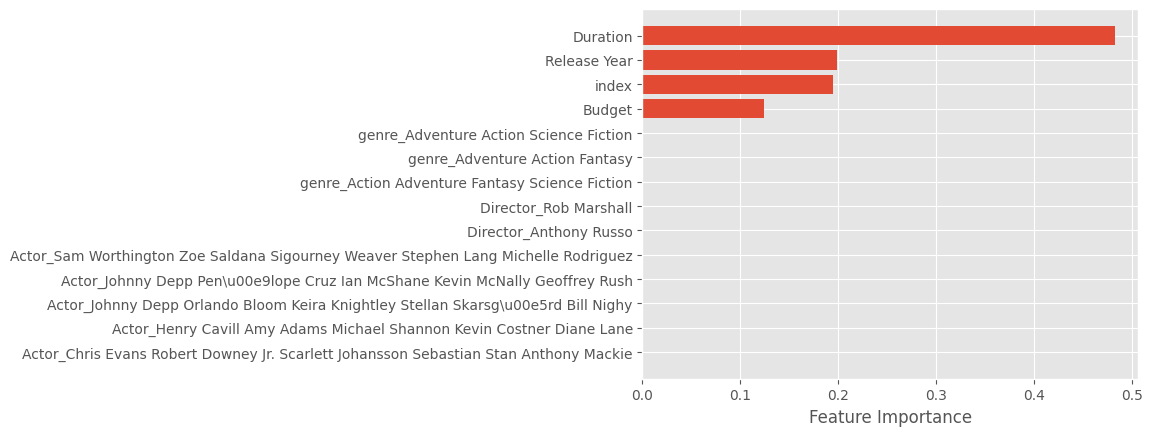

In [ ]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/sample_data/movies.csv')

# 1. Convert 'Budget' and 'Duration' to numeric before imputation:
data['Budget'] = pd.to_numeric(data['Budget'], errors='coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# 2. Split data into training and testing sets BEFORE imputation:
X = data.drop(columns=['Rating'])
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Impute missing values separately for training and testing sets:
# For numerical features:
for df in [X_train, X_test]:
    df['Budget'].fillna(X_train['Budget'].mean(), inplace=True)  # Use training set mean for imputation
    df['Duration'].fillna(X_train['Duration'].mean(), inplace=True) # Use training set mean for imputation

# For categorical features:
for df in [X_train, X_test]:
    df['genre'].fillna(X_train['genre'].mode()[0], inplace=True)
    df['Director'].fillna(X_train['Director'].mode()[0], inplace=True)
    df['Actor'].fillna(X_train['Actor'].mode()[0], inplace=True)

# 4. Impute missing values in the target variable (y_train, y_test):
y_train.fillna(y_train.mean(), inplace=True)  # or y_train.median()
y_test.fillna(y_train.mean(), inplace=True)    # Use training set mean for imputation

# ----> One-hot encode categorical features:
# You should perform one-hot encoding or another suitable encoding
# for categorical features like 'genre', 'Director', 'Actor' BEFORE
# training the model.
X_train = pd.get_dummies(X_train, columns=['genre', 'Director', 'Actor'])
X_test = pd.get_dummies(X_test, columns=['genre', 'Director', 'Actor'])

# Align columns between training and testing sets (in case of different categories)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

#-----> Ensure all columns are numeric
X_train = X_train.select_dtypes(include=['number']) # Select only numeric columns
X_test = X_test.select_dtypes(include=['number'])  # Select only numeric columns


# Create and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42) # Initialize the RandomForestRegressor model
rf_model.fit(X_train, y_train) # Train the model on the training data


# Get feature importance from Random Forest
feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()


plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx]) # Use X_train.columns for feature names
plt.xlabel('Feature Importance')
plt.show()